In [11]:
# decision_tree.py
import pandas as pd
# 参数初始化
filename = '../data/sales_data.xls'
data = pd.read_excel(filename, index_col = '序号')  # 导入数据
data

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高
6,坏,否,是,高
7,坏,是,否,高
8,好,是,是,高
9,好,是,否,高


In [15]:
# 数据是类别标签，要将它转换为数据
# 用1来表示“好”“是”“高”这三个属性，用-1来表示“坏”“否”“低”
data[data == '好'] = 1
data[data == '是'] = 1
data[data == '高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].astype(int)
y = data.iloc[:,3].astype(int)
data
# print (data)
# print (x)
# print (y)

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1
6,-1,-1,1,1
7,-1,1,-1,1
8,1,1,1,1
9,1,1,-1,1


In [13]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy')  # 建立决策树模型，基于信息熵
dtc.fit(x, y)  # 训练模型

# 导入相关函数，可视化决策树。
# 导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
from sklearn.tree import export_graphviz
x = pd.DataFrame(x)

# """
string1 = '''
edge [fontname="Songti SC"];
node [ fontname="Songti SC" size="15,15"];
{
 ''' 
string2 = '}'
# """
 
with open("../tmp/tree.dot", 'w') as f:
    export_graphviz(dtc, feature_names = x.columns, out_file = f)
    f.close()

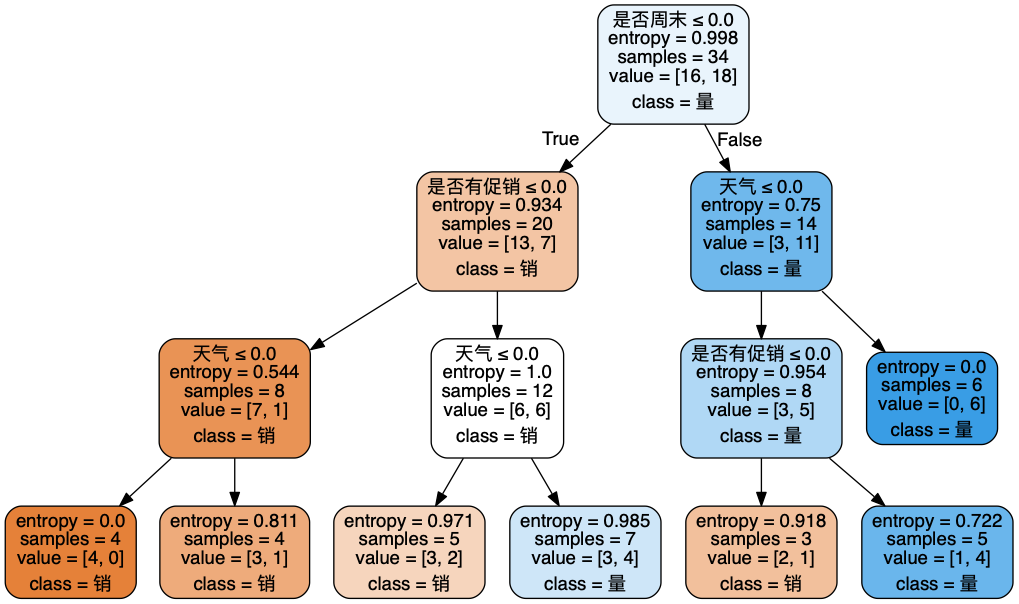

In [14]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 

dot_data = tree.export_graphviz(dtc, out_file=None,  #regr_1 是对应分类器
                         feature_names=data.columns[:3],   #对应特征的名字
                         class_names=data.columns[3],    #对应类别的名字
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('../tmp/example.png')    #保存图像
Image(graph.create_png())